In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv('Titanic-Dataset.csv')  
print(df.head())                      
print(df.info())                      
print(df.describe())                  


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [65]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print(df.isnull().sum())

Number of rows: 891
Number of columns: 12
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [67]:

df['Age'] = df['Age'].fillna(df['Age'].median())


df.drop('Cabin', axis=1, inplace=True)


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [69]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [71]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [73]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [77]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [79]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])


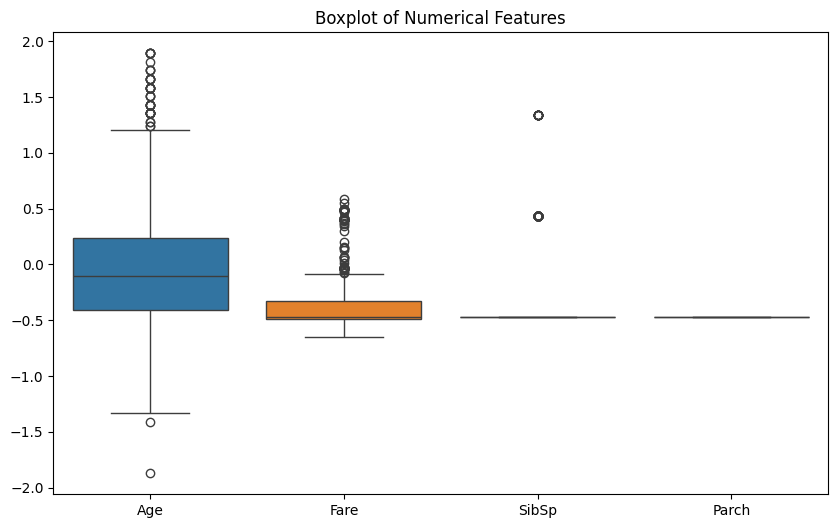

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot of Numerical Features")
plt.show()


In [87]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    df = remove_outliers_iqr(df, col)


In [89]:
print(df.shape)
print(df.head())


(577, 9)
   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736  0.432793 -0.473674 -0.502445       False   
2         1       3    1 -0.258337 -0.474545 -0.473674 -0.488854       False   
3         1       1    1  0.433312  0.432793 -0.473674  0.420730       False   
4         0       3    0  0.433312 -0.474545 -0.473674 -0.486337       False   
5         0       3    0 -0.104637 -0.474545 -0.473674 -0.478116        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  


In [91]:
print("Shape of the dataset:", df.shape)



Shape of the dataset: (577, 9)
